##  💲Credit Card Fraud Detection💳

🔎 <a href="https://credit-card-fraud-det-kc.herokuapp.com/" style="text-decoration:None;">LIVE PROJECT</a> 🔍

### Index
* <a href='#section1'>1. Introduction</a><br>
    * <a href='#section1_1'>Types of Credit Card Frauds</a><br>
* <a href='#section2'>2. Problem Statement</a>
* <a href='#section3'>3. Data Description</a>
* <a href='#section4'>4. Exploratory Data Analysis(EDA)</a>
    * <a href='#section4_1'>4.1 Descriptive Analysis</a><br>
    * <a href='#section4_2'>4.2 Time Distribution</a><br>
        * <a href='#section4_2_1'>4.2.1 Overall Time Distribution</a><br>
        * <a href='#section4_2_2'>4.2.2 Fraud VS Non-Fraud Time Distribution</a><br>
    * <a href='#section4_3'>4.3 Amount Distribution</a><br>
    * <a href='#section4_4'>4.4 Class Distribution</a><br>
    * <a href='#section4_5'>4.5 Correlation between features</a><br>
    * <a href='#section4_6'>4.6 Dimensionality Reduction and Clustering to visualize data in two dimension</a><br>
* <a href='#section5'>5. Preprocessing</a><br>
    * <a href='#section5_1'>5.1 Standardization</a><br>
* <a href='#section6'>6. Model Training, Tunning and Performance Evaluation</a><br>
    * <a href='#section6_1'>6.1 Class Imbalance Problem</a><br>     
        * <a href='#section6_1_1'>6.1.1 Using SMOTE to address Class Imbalance Problem</a><br>
        * <a href='#section6_1_2'>6.1.2 Fit the ressampled data to our LR Model</a><br>
    * <a href='#section6_2'>6.2 Fit the data(without resample) to LR Model</a><br>
    * <a href='#section6_3'>6.3 Borderline SMOTE</a><br>
    * <a href='#section6_4'>6.4 Random Forest Classifier</a><br>
    * <a href='#section6_5'>6.5 Random Forest Classifier with 'balanced_subsample'</a><br>
    * <a href='#section6_6'>6.6 Using Class Weights</a><br>
* <a href='#section7'>7. Conclusion</a><br>

<a id='section1'></a>
### 1. Introduction

As world is getting more towards digitalization, the risk of online fraud is also increasing. Most of the e-commerce and online websites are moving towards online payment mode which ultimately gives rise to online frauds. Also, due to this pandemic situation(COVID-19), everyone prefers to do cashless transaction which increases the chances of people getting trapped into such frauds. 

Among all of the online frauds, one such fraud is credit card fraud which is an ever growing menace in the financial industry. Detecting fraudulent transaction is of great importance for any credit card company.

In this project, we are going to approach this real life problem with Machine Learning.

<img src="Images/CC.png" width="500">

<a id='section1_1'></a>
**Types of Credit Card Fraud**
* `Card-Not-Present(CNP) Fraud`: Customers who are away from their physical card simply enter details and make a purchase. Customers should be aware when entering details, for instance they should not click on the link provided somewhere and don't get tricked into divulging confidential data such as password.


* `Lost and Stolen Card Frauds`: If Card has been stolen or lost, then pickpockter is free to use that card until it's blocked, cancelled or has hit the credit limit.


* `Card Never Arrived Fraud`: Card ordered by a customer but they never recieve it. Card is either intercepted by the wrong person before it reached to the customer or if your card is simply pinched from your letterbox.


* `False Application Fraud`: It occurs where the account was established using someone's else identity.


* `Counterfeit or Skimming Fraud`: Counterfeit occurs when details are illegaly taken to create a counterfeit credit card. 
Skimming is when a device steals the details of your credit card from its magnetic strip, generally happens in ATM.

<img src="Images/card-fraud-2018.png" width="500"/>


<a id='section2'></a>
### 2. Problem Statement

The development of a model that provide best results in identifying credit card fraudulent transactions.

This helps both, the credit card company and the customers from getting charged unecessarily. 

<a id='section3'></a>
### 3. Data Description

The dataset is obtained from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Kaggle</a>. 

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, they did not provided the original features and more background information about the data. 

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

There are **284807** number of transactions(rows) and **31** features in this dataset.

`Time`: It contains the seconds elapsed between each transaction and the first transaction in the dataset. 

`Amount`: It is the transaction Amount.

`Class`: It is the response variable and it takes value 1 in case of fraud and 0 otherwise.

<a id='section4'></a>
### 4. Exploratory Data Analysis(EDA)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [6]:
# Read data from csv file
df_cc = pd.read_csv('Dataset/creditcard.csv')

# Print first few rows
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<a id='section4_1'></a>
### 4.1 Descriptive Analysis

In [7]:
# Shape of the dataset
df_cc.shape

(284807, 31)

In [8]:
# The data is stardarized, I will explore them later For now I will look the "normal" columns
df_cc[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [9]:
# Explore the Features available in DataFrame
print(df_cc.info())
print()
print(f"There are {df_cc.isnull().sum().max()} NULL values in Dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# The general statistics of frauds and no frauds data
df_fraud = df_cc[df_cc['Class'] == 1]
df_normal = df_cc[df_cc['Class'] == 0]

print("Fraud Transaction Statistics")
print(df_fraud["Amount"].describe())
print("\nNormal Transaction Statistics")
print(df_normal["Amount"].describe())

Fraud Transaction Statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Transaction Statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


**NOTE:** From above stats, we have noticed that the maximum amount of transaction in fraudulent data is 2125 and amount of transaction in non-fraudulent data is quite high i.e. 25691.

In both cases(fraud and no-fraud) mean is greater than median, so we can say that the distribution of both of them are right skewed.

<a id='section4_2'></a>

<a id='section4_2_1'></a>
### 4.2.1 Overall Time Distribution

We will firstly focus on the features such as Time, Amount and Class, since rest of them are anonymized(unnamed).

In [11]:
df_cc['Time'].max()

172792.0

Time is the number of seconds elapsed between each transaction and the first transaction in the dataset.

The maximum time elapsed between last transaction and first transaction is 172792 seconds i.e. 48 hours. So, we can see that this dataset consist of transaction record of two days.

Let's explore more about it by visualizing the data.

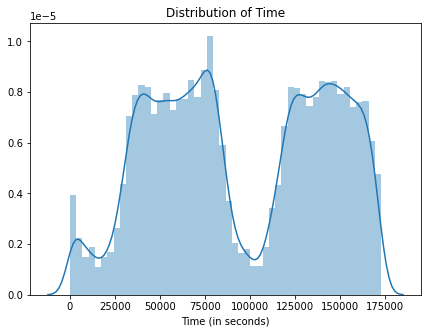

In [12]:
plt.figure(figsize=(7,5))
sns.distplot(df_cc["Time"])
plt.xlabel('Time (in seconds)')
plt.title('Distribution of Time');

**NOTE:** From the above graph, we have noticed that the distribution of time is bimodal in nature which inturns also indicates that there is a sudden fall in the volume of transactions after 28 hours of the first transaction been made.

As the timing of the transactions are not provided, we can assume that the drop in volume occured during night.

<a id='section4_2_2'></a>
### 4.2.2 Fraud VS Non-Fraud Time Distribution

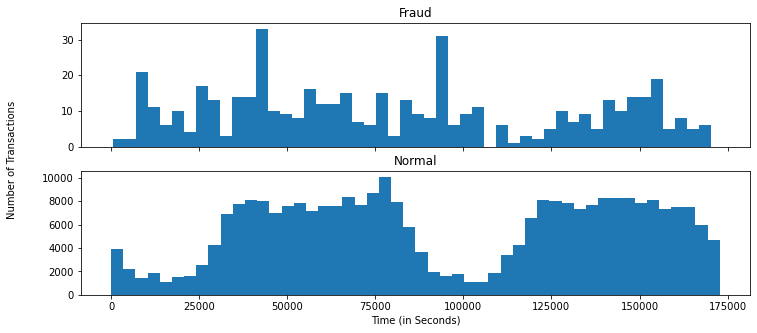

In [13]:
fraud_time = df_cc[df_cc['Class'] == 1]['Time']
no_fraud_time = df_cc[df_cc['Class'] == 0]['Time']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5))
bins=50

ax1.hist(fraud_time, bins = bins)
ax1.set_title('Fraud')

ax2.hist(no_fraud_time, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
fig.text(0.04,0.5, 'Number of Transactions', va='center', rotation='vertical')

plt.show()

**NOTE:** The graph indicates that Fraud transaction time are evenly distributed all over the place while non-fraud transaction time is bimodal in nature.

<a id='section4_3'></a>
### 4.3 Amount Distribution

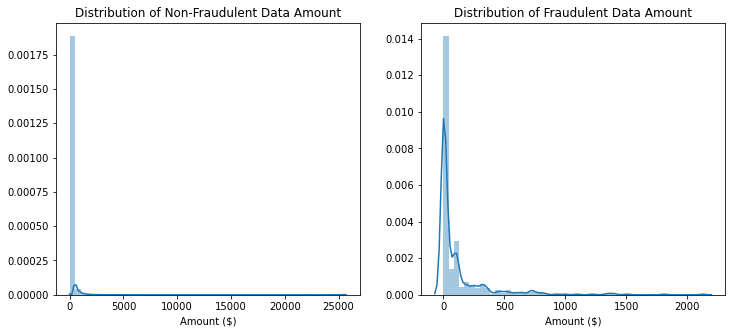

In [14]:
fraud_amt = df_cc[df_cc['Class'] == 1]['Amount']
no_fraud_amt = df_cc[df_cc['Class'] == 0]['Amount']

plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.distplot(no_fraud_amt)
plt.xlabel('Amount ($)')
plt.title('Distribution of Non-Fraudulent Data Amount')

plt.subplot(1, 2, 2)
sns.distplot(fraud_amt)
plt.xlabel('Amount ($)')
plt.title('Distribution of Fraudulent Data Amount');

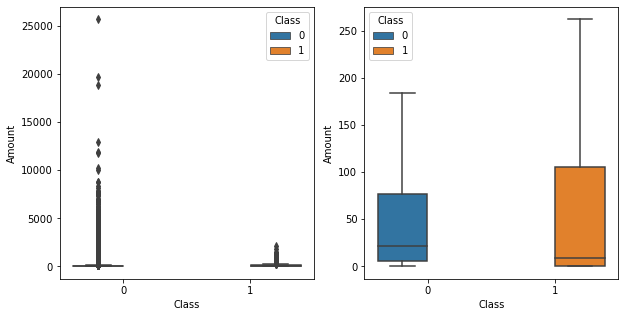

In [15]:
plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', hue='Class', data=df_cc, showfliers=True)

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', hue='Class', data=df_cc, showfliers=False);

In [16]:
print(f"Fraud Amount Info: \n {fraud_amt.describe()}")
print()
print(f"Non-Fraud Amount Info: \n {no_fraud_amt.describe()}")

Fraud Amount Info: 
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fraud Amount Info: 
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


**NOTE:** The dataset contains 284,807 transactions, the mean transaction amount for non-fraudulent data is `$88.29`  and median is `$9` while the maximum transaction amount turns out to be `$25691`.
We can say that the distribution of non-fraudulent transactions is heavily right skewed i.e. mostly all transaction are under amount `$180` rest are outliers.

In case of fraudulent data, the mean transaction amount is `$121`  and median is `$22` while the maximum transaction amount is `$2125`. This means that the distribution of fraud transaction amount is also right skewed i.e. mostly all transaction are under amount `$250` rest are outliers.

<a id='section4_4'></a>
### 4.4 Class Distribution

Total NON-FRAUD CASES: 284315, 99.827%
Total FRAUD CASES: 492, 0.173%


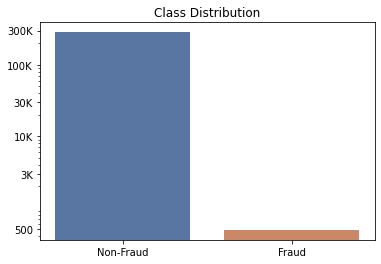

In [17]:
# Count the occurences of Fraud and Non-Fraud Cases
occ = df_cc['Class'].value_counts()
print(f"Total NON-FRAUD CASES: {occ[0]}, {(occ[0]/len(df_cc.index)*100):0.3f}%")
print(f"Total FRAUD CASES: {occ[1]}, {(occ[1]/len(df_cc.index)*100):0.3f}%")

plt.bar(x=occ.index, height=occ.values, data=occ, color=['#5976A2', '#CB8866'])
plt.title('Class Distribution');
plt.yscale('log')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.yticks([500,3000,10000,30000,100000,300000], ['500','3K','10K','30K', '100K', '300K'])
plt.show();

**NOTE:** As we can see the number of fraudulent transaction are very low as compared to Non-Fraudulent transaction. 

Building a model with such huge class difference would not be a great idea because then the model will not able to recognise fraudulent transaction, we might get a lot of errors and our algorithm will probably overfit since it will assume all transactions as `fraud`. We need to keep that in mind while building our model.

**Things to Remember:** Class Imbalance problem in the dataset.

<a id='section4_5'></a>
### 4.5 Correlation between features

It would be interesting to know if there is any significant correlation between our predictors. Let's do this using heatmap.

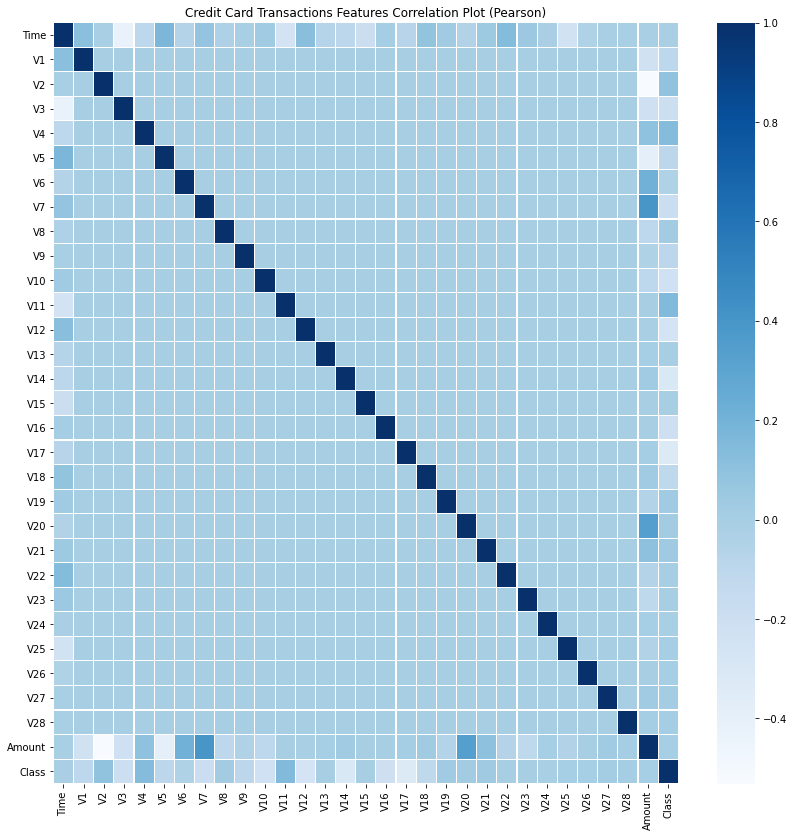

In [18]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions Features Correlation Plot (Pearson)')
corr = df_cc.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

**NOTE:** As we can see, some of the predictors do seem to have correlation between them. But majority of the predictors are not correlated. This could be due to some factors:

* The dimensionality of data is already reduced using PCA(Principle Componenet Analysis), therefore our predictors are principal components. Principal Components are orthogonal to each other.

* The huge class imbalance might distort the importance of certain correlations with regards to our class variable.

<a id='section4_6'></a>
### 4.6 Dimensionality Reduction and Clustering to visualize data in two dimension

In [19]:
def prep_undersampled_data(df):
    fraud_df = df.loc[df['Class'] == 1]
    non_fraud_df = df.loc[df['Class']==0][:fraud_df.shape[0]]
    undersampled_df = pd.concat([fraud_df, non_fraud_df])
    df_col = [column for column in undersampled_df.columns if column not in ['Time','Class']]
    X = undersampled_df.loc[:, df_col]
    X = np.array(X).astype(np.float)
    y = undersampled_df.loc[:, undersampled_df.columns == 'Class']
    y = np.array(y).astype(np.float).reshape(-1,)
    return X, y

In [20]:
X_under, y_under = prep_undersampled_data(df_cc)

In [21]:
# TSNE
tsne = manifold.TSNE(n_components=2, random_state=2020)
transformed_data = tsne.fit_transform(X_under)
tsne_df = pd.DataFrame(np.column_stack((transformed_data, y_under)), columns=["X","Y","Targets"])
tsne_df.loc[:,"Targets"] = tsne_df.Targets.astype(int)

In [22]:
# PCA
pca = PCA(n_components=2, random_state=2020)
transformed_data = pca.fit_transform(X_under)
pca_df = pd.DataFrame(np.column_stack((transformed_data, y_under)), columns=["X","Y","Targets"])
pca_df.loc[:,"Targets"] = pca_df.Targets.astype(int)

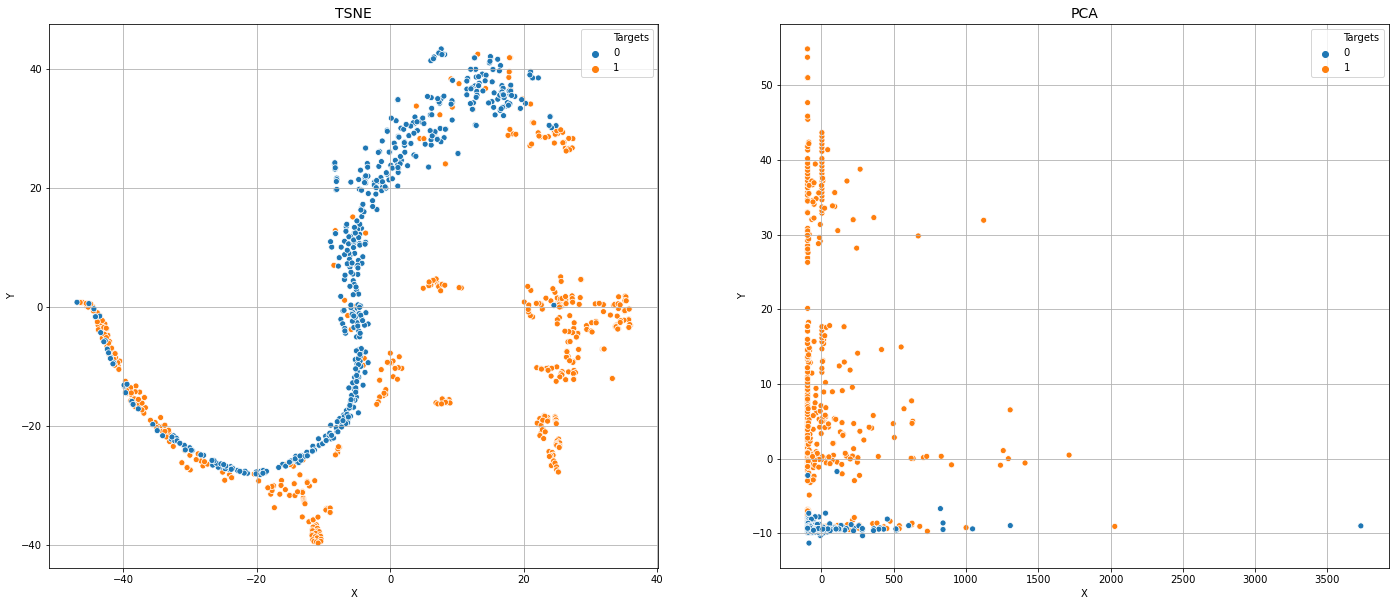

In [23]:
ax, f = plt.subplots(1, 2, figsize=(24,10))

plt.subplot(121)
sns.scatterplot("X","Y", hue='Targets', data=tsne_df)
plt.title('TSNE', fontsize=14)
plt.grid(True)

plt.subplot(122)
sns.scatterplot("X","Y", hue='Targets', data=pca_df)
plt.title('PCA', fontsize=14)
plt.grid(True)

plt.show()

<a id='section5'></a>
### 5. Data Preprocessing

<a id='section5_1'></a>
### 5.1 Standardization

The Feature `Amount` ranges from 0 to 25691.16. To reduce its wide range, I used Standardization to remove the mean and scale to unit variance, so that 68% of the values lie in betweeen (-1,1).

In [24]:
df_cc['normAmount'] = StandardScaler().fit_transform(df_cc['Amount'].values.reshape(-1, 1))
df_cc = df_cc.drop(['Amount'],axis=1)
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


**NOTE:** Since our dataset is already processed as PCA is done on 29 features and we have also standardized other remaining features, we are good to go ahead.

If any changes are required in the dataset during the modeling process, we will do it on the go.

<a id='section6'></a>
### 6. Model Training, Tunning and Performance Evaluation

In [25]:
def prep_data(df):
    df_col = [column for column in df.columns if column not in ['Time','Class']]
    X = df.loc[:, df_col]
    X = np.array(X).astype(np.float)
    y = df.loc[:, df.columns == 'Class']
    y = np.array(y).astype(np.float).reshape(-1,)
    return X, y

In [26]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class: Non-Fraud", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class: Fraud", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [27]:
# Create X and y from our above defined function
X, y = prep_data(df_cc)

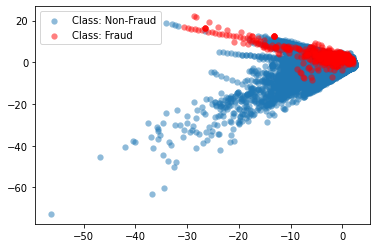

In [28]:
# Plot our data by running plot_data function on X and y
plot_data(X, y)

**NOTE:** Since there is a class imbalance problem in our dataset as we can see from above graph, we are going to increase class 1(i.e. Fraud Transaction) data points.

We are going to use Synthetic Minority Over-sampling Technique (SMOTE), because it creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data.

<a id='section6_1'></a>

<a id='section6_1_1'></a>
### 6.1.1 Using SMOTE to address Class Imbalance Problem

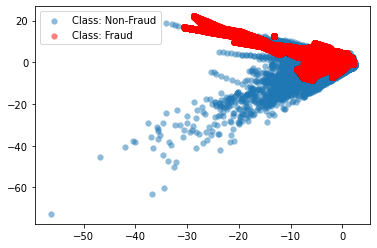

In [29]:
# Define the resampling method
smote_method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = smote_method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

Our minority class is now much more prominently visible in our data.

In [30]:
X_resampled.shape, y_resampled.shape

((568630, 29), (568630,))

In [31]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    
    plt.figlegend((c0, c1), ('Class: Non-Fraud', 'Class: Fraud'), loc='lower center',
                  ncol=2, labelspacing=0.)
    return plt.show()

##### Compare SMOTE to original data

Total NON-FRAUD cases in Original Dataset: 284315
Total FRAUD cases in Original Dataset: 492

Total NON-FRAUD cases in SMOTE Resampled Dataset: 284315
Total FRAUD cases in SMOTE Resampled Dataset: 284315


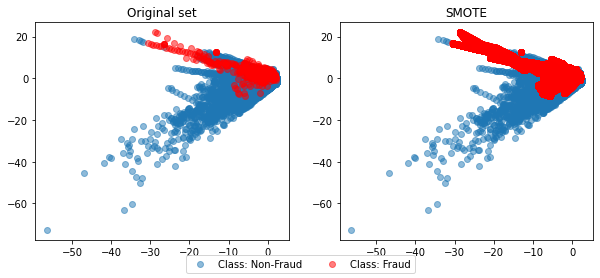

In [32]:
print(f"Total NON-FRAUD cases in Original Dataset: {pd.Series(y).value_counts()[0]}")
print(f"Total FRAUD cases in Original Dataset: {pd.Series(y).value_counts()[1]}")
print()
print(f"Total NON-FRAUD cases in SMOTE Resampled Dataset: {pd.Series(y_resampled).value_counts()[0]}")
print(f"Total FRAUD cases in SMOTE Resampled Dataset: {pd.Series(y_resampled).value_counts()[1]}")

compare_plot(X, y, X_resampled, y_resampled, method="SMOTE")

SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on data very clearly.

In [33]:
def plot_roc_curve(true_y, pred_y):
    """
    Plot the ROC curve along with the curves AUC for a given model. Note make sure true_y and pred_y are from the same model as model_name
    :param model_name: Name of model used for saving plot
    :param true_y: true labels for dataset
    :param pred_y: predicted labels for dataset
    """
    fig, ax = plt.subplots(1,1, figsize=(7,7))
    fpr, tpr, thresholds = roc_curve(true_y, pred_y)
    ax.plot(fpr, tpr, label=f'AUC: {auc(fpr, tpr):.2f}')
    ax.legend()
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    
    return

<a id='section6_1_2'></a>
### 6.1.2 Fit the ressampled data to our LR Model

In [34]:
# Let's Split Resampled Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [35]:
# Logistic Regression Combined with SMOTE
resampling = SMOTE()
model_lr = LogisticRegression()

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model_lr)])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [36]:
# Print the Classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predictions))

print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions):.2f}\n')

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)

print('Confusion matrix:\n', conf_mat)

tn, fp, fn, tp = conf_mat.ravel()

print()
print(f"TN : {tn}")
print(f"FP : {fp}")
print(f"FN : {fn}")
print(f"TP : {tp}")

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     85309
         1.0       0.05      0.91      0.10       134

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.99     85443

ROC-AUC Score: 0.94

Confusion matrix:
 [[83105  2204]
 [   12   122]]

TN : 83105
FP : 2204
FN : 12
TP : 122


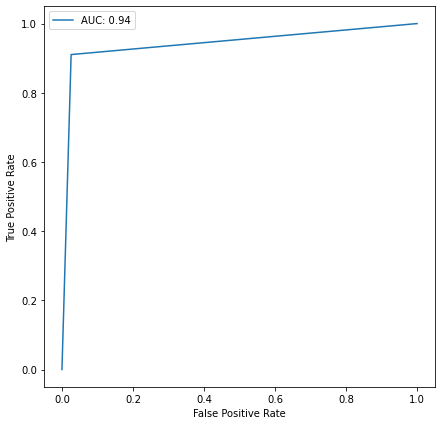

In [37]:
plot_roc_curve(y_test, predictions)

**NOTE:** Not in all cases resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly. 

<a id='section6_2'></a>
### 6.2 Fit the data(without resample) to LR Model

In [38]:
# Split data into train and test set (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [39]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Obtain Model Prediction
predictions_lr = model_lr.predict(X_test)

In [40]:
# Print the Classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predictions_lr))

print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_lr):.2f}\n')

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions_lr)

print('Confusion matrix:\n', conf_mat)

tn,fp,fn,tp = conf_mat.ravel()

print()
print(f"TN : {tn}")
print(f"FP : {fp}")
print(f"FN : {fn}")
print(f"TP : {tp}")

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.84      0.63      0.72       134

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.81

Confusion matrix:
 [[85293    16]
 [   50    84]]

TN : 85293
FP : 16
FN : 50
TP : 84


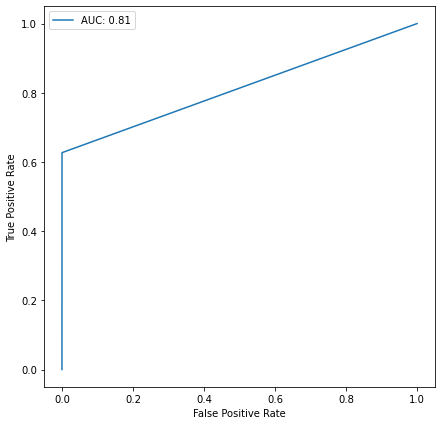

In [41]:
plot_roc_curve(y_test, predictions_lr)

**NOTE:** As we can clearly see that model without resampled data gives better results as compare to the model with resampled data. This might be due to the remsampling method SMOTE which probably has introduced some bias in our dataset.

Let's try another type of SMOTE i.e. Borderline SMOTE

<a id='section6_3'></a>
### 6.3 Borderline SMOTE

This algorithm is a variant of the original SMOTE algorithm. Borderline samples will be detected and used to generate new synthetic samples.

In [128]:
# Logistic Regression Combined with SMOTE
resampling = BorderlineSMOTE()

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model_lr)])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

In [129]:
# Print the Classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predictions))

print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions):.2f}\n')

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)

print('Confusion matrix:\n', conf_mat)

tn,fp,fn,tp = conf_mat.ravel()
print()
print(f"TN : {tn}")
print(f"FP : {fp}")
print(f"FN : {fn}")
print(f"TP : {tp}")

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     85309
         1.0       0.16      0.84      0.27       134

    accuracy                           0.99     85443
   macro avg       0.58      0.92      0.63     85443
weighted avg       1.00      0.99      1.00     85443

ROC-AUC Score: 0.92

Confusion matrix:
 [[84707   602]
 [   21   113]]

TN : 84707
FP : 602
FN : 21
TP : 113


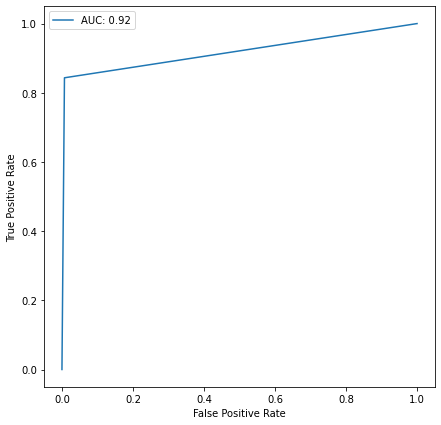

In [130]:
plot_roc_curve(y_test, predictions)

**NOTE:** Not in all cases resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly. 

In [131]:
# Count the Total Number of Observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations
non_fraud = [i for i in y if i==0]
count_non_fraud = non_fraud.count(0)

# Percentage of Non-Fraud Observations
percentage = count_non_fraud / total_obs * 100
print(f"Percentage of NON-FRAUD observations: {percentage:0.2f}%")

Percentage of NON-FRAUD observations: 99.83%


**NOTE:** This tells us that by doing nothing, we would be correct in 99.83% of the cases. So, if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct. Let's see how a random forest does in predicting fraud in our data.

<a id='section6_4'></a>
### 6.4 Fit the data using Random Forest Classifier 

In [132]:
# Random Forest Model
model_rf = RandomForestClassifier(random_state=2020, n_estimators=20)

# Fit the model to our training set
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=2020)

In [133]:

# Obtain predictions from the test data
predictions_rf = model_rf.predict(X_test)

# Predict Probabilities
probs = model_rf.predict_proba(X_test)

# Print Accuracy Score
print(f"Accuracy Score : {accuracy_score(y_test, predictions_rf):0.4f}%")
print()
# Print ROC Score
print(f"ROC Score : {roc_auc_score(y_test, probs[:,1])}")
print()
# Print the Classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predictions_rf))

print(f'ROC-AUC Score: {roc_auc_score(y_test, predictions_rf):.2f}\n')

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions_rf)

print()

print('Confusion matrix:\n', conf_mat)
tn,fp,fn,tp = conf_mat.ravel()
print()
print(f"TN : {tn}")
print(f"FP : {fp}")
print(f"FN : {fn}")
print(f"TP : {tp}")

Accuracy Score : 0.9996%

ROC Score : 0.9435359919855877

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.93      0.78      0.85       134

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.89


Confusion matrix:
 [[85301     8]
 [   30   104]]

TN : 85301
FP : 8
FN : 30
TP : 104


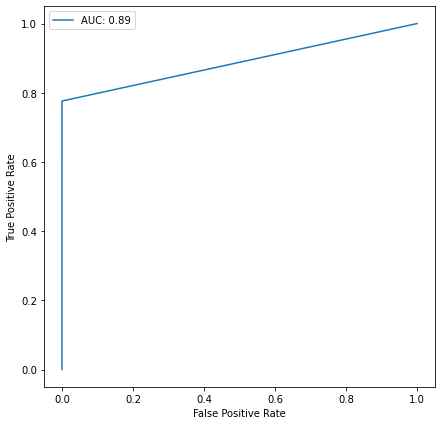

In [134]:
plot_roc_curve(y_test, predictions_rf)

**NOTE:** We have now obtained more meaningful performance metrics that tell us how well the model performs, given the highly imbalanced data that we're working with. 


This model predict 104 cases of fraud out of 134 fraud cases.

We have only 8 False Positives, as a result we have achieved high precision score. 

But unfortunately we got higher number of False Negative i.e. 30 which will ultimately gives a low recall which is not good for this problem.

A balance between precision and recall needs to be achieved in our model, otherwise we might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.

In [135]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predictions_rf)
print(f'Average Precision: {average_precision:.3f}%')

Average Precision: 0.721%


In [136]:
# Obtain Precision and Recall 
precision, recall, _ = precision_recall_curve(y_test, predictions_rf)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.0015683  0.92857143 1.        ]
Recall: [1.        0.7761194 0.       ]


In [137]:
def plot_pr_curve(recall, precision, average_precision):
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-Class Precision-Recall curve: AP = {average_precision:0.2f}')
    return plt.show()

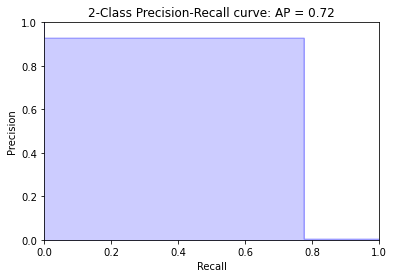

In [138]:
# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

<a id='section6_5'></a>
### 6.5 Random Forest Classifier with 'balanced_subsample'

`balanced` mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

The `balanced_subsample` mode is the same as `balanced` except that weights are computed based on the bootstrap sample for every tree grown.

In [139]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=2020, n_estimators=100)

# Fit your training model to your training set
model.fit(X_train, y_train);

In [140]:
# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

print('\nClassification Report:')

print(classification_report(y_test, predicted))

print(f'ROC-AUC Score: {roc_auc_score(y_test, predicted):.2f}\n')

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

tn,fp,fn,tp = confusion_matrix(y_test, predicted).ravel()
print()
print(f"TN : {tn}")
print(f"FP : {fp}")
print(f"FN : {fn}")
print(f"TP : {tp}")


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.95      0.78      0.86       134

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.89


Confusion Matrix:
[[85303     6]
 [   29   105]]

TN : 85303
FP : 6
FN : 29
TP : 105


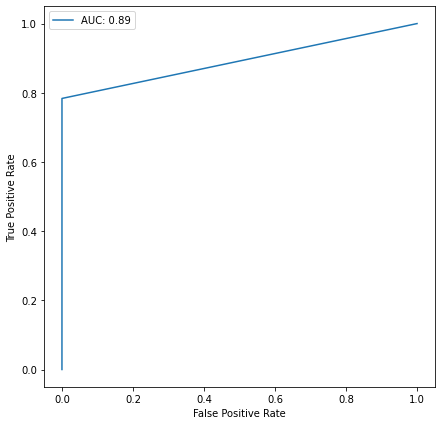

In [141]:
plot_roc_curve(y_test, predicted)

**NOTE:** No big changes as compared to the previous model.

Let's explore more methods to get a good recall as well as precision.

<a id='section6_6'></a>
### 6.6 Using Class Weights 

In [88]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)

    print('\nClassification Report:')
    
    print(classification_report(y_test, predicted))

    print(f'ROC-AUC Score: {roc_auc_score(y_test, predicted):.2f}\n')

    print('\nConfusion Matrix:')
    plt.figure()
    cm = confusion_matrix(y_test, predicted)
    
    plot_confusion_matrix(cm, figsize=(4,4), hide_ticks=True, cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Normal', 'Fraud'], fontsize=16)
    plt.yticks(range(2), ['Normal', 'Fraud'], fontsize=16)
    plt.show()
    plot_roc_curve(y_test, predictions);

In [75]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """
    # Total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0) / N
    negative_frequencies = 1 - positive_frequencies
    
    return positive_frequencies, negative_frequencies

In [76]:
# Computing class frequencies for our training set
freq_pos, freq_neg = compute_class_freqs(y_train)
pos_weights = freq_neg
neg_weights = freq_pos
class_weights = {0: neg_weights, 1:pos_weights}
class_weights

{0: 0.0017957103589414337, 1: 0.9982042896410586}


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.82      0.84      0.83       134

    accuracy                           1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.92


Confusion Matrix:


<Figure size 432x288 with 0 Axes>

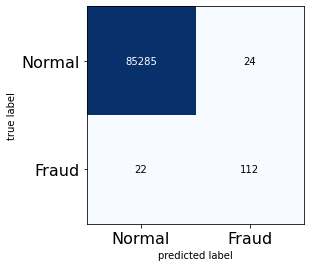

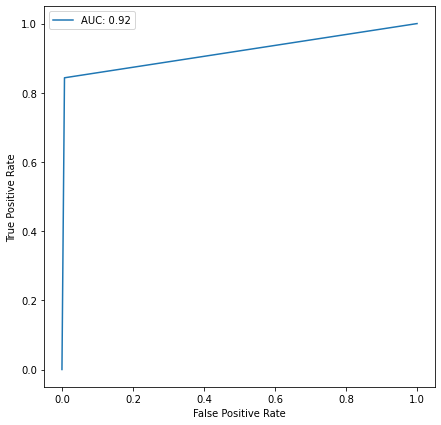

In [84]:
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight = class_weights,
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=2020)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

**NOTE:** By defining more options in the model, we obtained better predictions. 

We have effectively reduced the number of false negatives, i.e. we are catching more cases of fraud, while keeping the number of false positives low.

Let's use GridSearchCV to find out the best parameters to fit our model.

In [46]:
# Define the paramter sets to test
param_grid = {'n_estimators': [1,30],
              'max_features': ['auto', 'log2'],
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the mode to use
model = RandomForestClassifier(random_state=2020)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 30}

In [47]:
joblib.dump(CV_model.best_estimator_, 'Estimators/CC_Best_Estimator')
joblib.dump(CV_model.best_params_, 'Params/CC_Best_Params')

['Params/CC_Best_Params']

In [48]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight=class_weights,
                               criterion='gini',
                               max_depth=12,
                               max_features='auto', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=2020)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.0017957103589414337,
                                     1: 0.9982042896410586},
                       max_depth=12, min_samples_leaf=10, n_estimators=30,
                       n_jobs=-1, random_state=2020)

In [85]:
if False:
    model = joblib.load('Models/CC_Model.pkl')


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85309
         1.0       0.82      0.84      0.83       134

    accuracy                           1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.92


Confusion Matrix:


<Figure size 432x288 with 0 Axes>

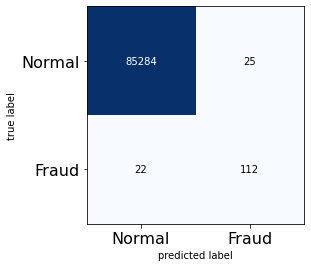

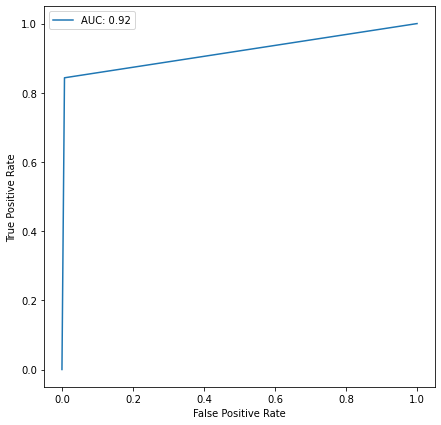

In [87]:
# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model);

**NOTE:** This is the best model we have got till now, it predicts fraud and non-fraud transactions pretty well.

There is a perfect balance between Recall and Precision which is a good thing here.

<a id='section7'></a>
### 7. Conclusion

We have investigated the data to get some insights out of it, checked for data imbalance, visualized all features and their relationship with each other. 

In order to detect Credit Card Fraud with overly imbalanced data is such a difficult and time-consuming task. 

I have tried many things to keep up the balance between recall and precision. 

We started with `SMOTE` to balance the dataset, but after fitting data I find out that it doesn't work well may be because new examples are synthesized from the existing examples. Precision and F1-Score are very low.

Next we have implemented other type of SMOTE i.e. `Borderline  SMOTE` to overcome class imbalance problem. Our model definitely improved as compared to normal SMOTE but still the results are not satisfactory.Precision and F1-score are low.

Then, We have used `Random Forest` Ensemble Algorithm, which has definitely decreased False Positives but False Negatives are higher in number. No balance between Recall and Precision. 

We then followed `Random Forest with Class Weights`, which did not improved our model.

We then found the positive and negative `class weights` and presented to the `Random Forest` Algorithm, False Negatives has decreased from 29 to 22, but precision again increased from 6 to 24, which is not a great thing but balance between Recall, Precision and F1-score are satisfactory .

Lastly, we approached the problem with hyperparameter tunning for `Random Forest` and find out the best estimators which gave us good recall and precision.

| Algorithm | Accuracy (%) | Recall (%) | Precision (%) | F1 Score (%) | ROC-AUC Score (%) |
| --- | --- | --- | --- | --- | --- |
| Logistic Regression | 100 | 63 | 84 | 72 | 81 |  
| Logistic Regression with SMOTE| 97 | 91 | 5 | 10 | 94 |
| Logistic Regression with Borderline SMOTE| 99 | 84 | 16 | 27 | 92 |
| RandomForest Classifier | 100 | 78 | 93 | 85 | 89 |
| RandomForest with balanced_subsample | 100 | 78 | 95 | 86 | 89 |
| RandomForest with class_weights | 100 | 84 | 82 | 83 | 92 |
| RandomForest with GridSearchCV | 100 | 84 | 82 | 83 | 92 |